In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
df = pd.read_csv('./Data/Data.csv')
df.head()

date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


The dataset is having 8 columns consisting of the main air pollutants and the data collected starts from 25th November 2020 to Jan 24th 2023.

Total of 18776 rows and 8 columns.

There are no null values in the data.

In [36]:
df.describe()

co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000     33.930000      0.340000     34.810000   
50%     1842.500000      5.250000     54.150000     27.180000     52.930000   
75%     3685.000000     35.760000     83.630000     92.980000     82.020000   
max    21148.680000    500.680000    460.620000    801.090000    579.830000   

              pm2_5          pm10           nh3  
count  18776.000000  18776.000000  18776.000000  
mean     238.130309    300.092966     25.109815  
std      226.533625    267.165827     26.402108  
min       11.830000     15.070000      0.000000  
25%       84.440000    118.797500      9.630000  
50%      157.445000    209.705000     17.480000  
75%      313.000000    387.965000     30.400000  
max     1708.090000   1969.930000    287.770000

From the statistical analysis it can be observed that all the parameters are high level of outlier values.



In [51]:
df.rename(columns = {'co':'Carbon Monoxide,μg/m3','no':'Nitrogen Oxide,μg/m3','no2':'Nitrogen Dioxide,μg/m3','o3':'Ozone,μg/m3',
          'so2':'Sulphur Dioxide,μg/m3','pm2_5':'PM2.5,μg/m3','pm10':'PM10,μg/m3','nh3':'Ammonia,μg/m3'},inplace = True)

In [52]:
df.head(5)

date  Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  \
0 2020-11-25 01:00:00                2616.88                  2.18   
1 2020-11-25 02:00:00                3631.59                 23.25   
2 2020-11-25 03:00:00                4539.49                 52.75   
3 2020-11-25 04:00:00                4539.49                 50.96   
4 2020-11-25 05:00:00                4379.27                 42.92   

   Nitrogen Dioxide,μg/m3  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  \
0                   70.60        13.59                  38.62       364.61   
1                   89.11         0.33                  54.36       420.96   
2                  100.08         1.11                  68.67       463.68   
3                  111.04         6.44                  78.20       454.81   
4                  117.90        17.17                  87.74       448.14   

   PM10,μg/m3  Ammonia,μg/m3  year  month   Day_name  hour  day  Day  \
0      411.73          28.63  2020     11  Wednesday     1   25   25   
1      486.21          41.04  2020     11  Wednesday     2   25   25   
2      541.95          49.14  2020     11  Wednesday     3   25   25   
3      534.00          48.13  2020     11  Wednesday     4   25   25   
4      529.19          46.61  2020     11  Wednesday     5   25   25   

   Week_day  week  
0         2     2  
1         2     2  
2         2     2  
3         2     2  
4         2     2

In [53]:
df.isnull().sum()

date                      0
Carbon Monoxide,μg/m3     0
Nitrogen Oxide,μg/m3      0
Nitrogen Dioxide,μg/m3    0
Ozone,μg/m3               0
Sulphur Dioxide,μg/m3     0
PM2.5,μg/m3               0
PM10,μg/m3                0
Ammonia,μg/m3             0
year                      0
month                     0
Day_name                  0
hour                      0
day                       0
Day                       0
Week_day                  0
week                      0
dtype: int64

Lets Observe The relation of each Variable with each other using the pairplot. 

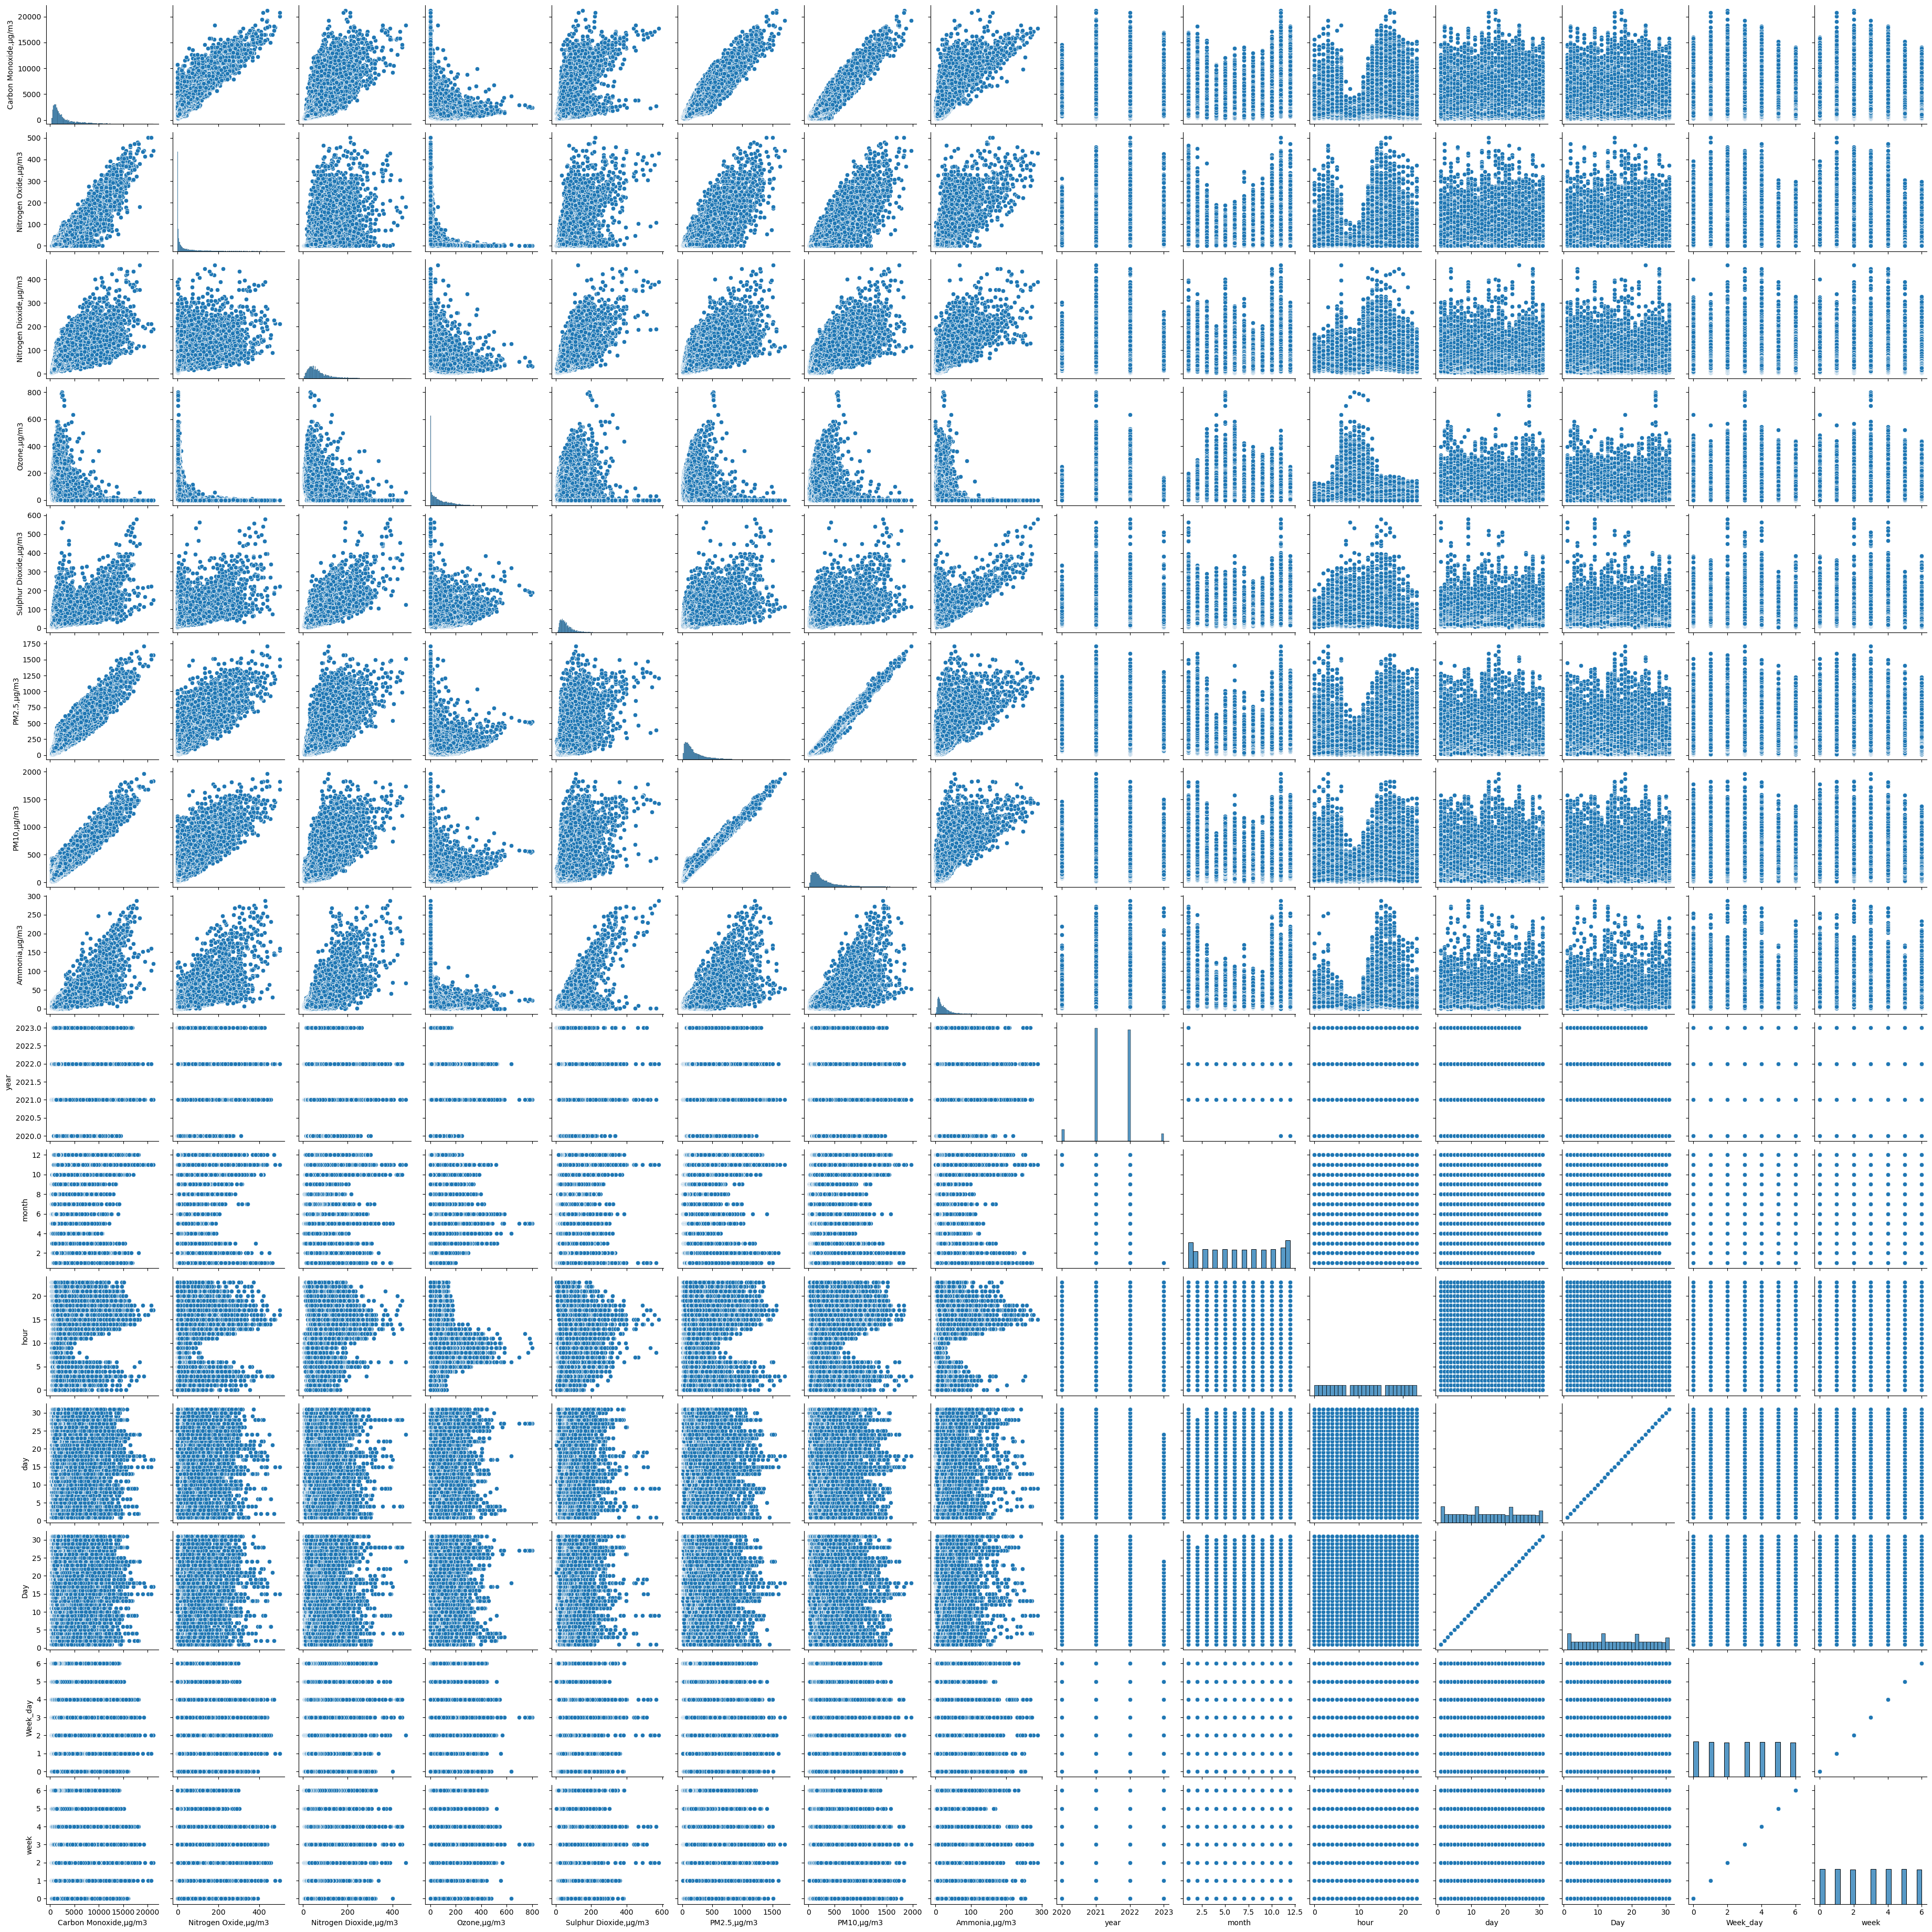

In [54]:
sns.pairplot(df,hue = None,palette="cubehelix")
plt.show()

From the pairplot it can be observed that all the parameters are having almost linear relationship with each other

In [55]:
df['date'] = pd.to_datetime(df['date'])
import datetime as dt
df['year'] = df['date'].dt.year
df['month']=df['date'].dt.month
df['week'] = df['date'].dt.weekday
df['Day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].apply(lambda x : int(x.hour))
df['day'] = df['date'].dt.day
df.head(5)

date  Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  \
0 2020-11-25 01:00:00                2616.88                  2.18   
1 2020-11-25 02:00:00                3631.59                 23.25   
2 2020-11-25 03:00:00                4539.49                 52.75   
3 2020-11-25 04:00:00                4539.49                 50.96   
4 2020-11-25 05:00:00                4379.27                 42.92   

   Nitrogen Dioxide,μg/m3  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  \
0                   70.60        13.59                  38.62       364.61   
1                   89.11         0.33                  54.36       420.96   
2                  100.08         1.11                  68.67       463.68   
3                  111.04         6.44                  78.20       454.81   
4                  117.90        17.17                  87.74       448.14   

   PM10,μg/m3  Ammonia,μg/m3  year  month   Day_name  hour  day  Day  \
0      411.73          28.63  2020     11  Wednesday     1   25   25   
1      486.21          41.04  2020     11  Wednesday     2   25   25   
2      541.95          49.14  2020     11  Wednesday     3   25   25   
3      534.00          48.13  2020     11  Wednesday     4   25   25   
4      529.19          46.61  2020     11  Wednesday     5   25   25   

   Week_day  week  
0         2     2  
1         2     2  
2         2     2  
3         2     2  
4         2     2

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    18776 non-null  datetime64[ns]
 1   Carbon Monoxide,μg/m3   18776 non-null  float64       
 2   Nitrogen Oxide,μg/m3    18776 non-null  float64       
 3   Nitrogen Dioxide,μg/m3  18776 non-null  float64       
 4   Ozone,μg/m3             18776 non-null  float64       
 5   Sulphur Dioxide,μg/m3   18776 non-null  float64       
 6   PM2.5,μg/m3             18776 non-null  float64       
 7   PM10,μg/m3              18776 non-null  float64       
 8   Ammonia,μg/m3           18776 non-null  float64       
 9   year                    18776 non-null  int32         
 10  month                   18776 non-null  int32         
 11  Day_name                18776 non-null  object        
 12  hour                    18776 non-null  int64 

In [57]:
df.describe()

date  Carbon Monoxide,μg/m3  \
count                          18776           18776.000000   
mean   2021-12-23 14:35:34.384320256            2929.228628   
min              2020-11-25 01:00:00             260.350000   
25%              2021-06-09 14:45:00            1068.120000   
50%              2021-12-22 04:30:00            1842.500000   
75%              2022-07-07 18:15:00            3685.000000   
max              2023-01-24 08:00:00           21148.680000   
std                              NaN            2854.523506   

       Nitrogen Oxide,μg/m3  Nitrogen Dioxide,μg/m3   Ozone,μg/m3  \
count          18776.000000            18776.000000  18776.000000   
mean              33.660702               66.221299     60.346239   
min                0.000000                4.280000      0.000000   
25%                0.680000               33.930000      0.340000   
50%                5.250000               54.150000     27.180000   
75%               35.760000               83.630000     92.980000   
max              500.680000              460.620000    801.090000   
std               62.127118               48.527492     80.464932   

       Sulphur Dioxide,μg/m3   PM2.5,μg/m3    PM10,μg/m3  Ammonia,μg/m3  \
count           18776.000000  18776.000000  18776.000000   18776.000000   
mean               66.693633    238.130309    300.092966      25.109815   
min                 5.250000     11.830000     15.070000       0.000000   
25%                34.810000     84.440000    118.797500       9.630000   
50%                52.930000    157.445000    209.705000      17.480000   
75%                82.020000    313.000000    387.965000      30.400000   
max               579.830000   1708.090000   1969.930000     287.770000   
std                49.439191    226.533625    267.165827      26.402108   

               year         month          hour           day           Day  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2021.470121      6.609608     11.497017     15.678259     15.678259   
min     2020.000000      1.000000      0.000000      1.000000      1.000000   
25%     2021.000000      3.000000      5.000000      8.000000      8.000000   
50%     2021.000000      7.000000     11.000000     16.000000     16.000000   
75%     2022.000000     10.000000     17.000000     23.000000     23.000000   
max     2023.000000     12.000000     23.000000     31.000000     31.000000   
std        0.635113      3.621966      6.922565      8.812657      8.812657   

           Week_day          week  
count  18776.000000  18776.000000  
mean       2.989561      2.989561  
min        0.000000      0.000000  
25%        1.000000      1.000000  
50%        3.000000      3.000000  
75%        5.000000      5.000000  
max        6.000000      6.000000  
std        1.999333      1.999333

In [59]:
df1 = df.drop(['date'],axis = 1)

In [61]:
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
df1['seasons']=df1['month'].map(seasons)
df1.head()

Carbon Monoxide,μg/m3  Nitrogen Oxide,μg/m3  Nitrogen Dioxide,μg/m3  \
0                2616.88                  2.18                   70.60   
1                3631.59                 23.25                   89.11   
2                4539.49                 52.75                  100.08   
3                4539.49                 50.96                  111.04   
4                4379.27                 42.92                  117.90   

   Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  \
0        13.59                  38.62       364.61      411.73          28.63   
1         0.33                  54.36       420.96      486.21          41.04   
2         1.11                  68.67       463.68      541.95          49.14   
3         6.44                  78.20       454.81      534.00          48.13   
4        17.17                  87.74       448.14      529.19          46.61   

   year  month   Day_name  hour  day  Day  Week_day  week seasons  
0  2020     11  Wednesday     1   25   25         2     2  Autumn  
1  2020     11  Wednesday     2   25   25         2     2  Autumn  
2  2020     11  Wednesday     3   25   25         2     2  Autumn  
3  2020     11  Wednesday     4   25   25         2     2  Autumn  
4  2020     11  Wednesday     5   25   25         2     2  Autumn

Pollutants Concentration in Different Years for Different Seasons

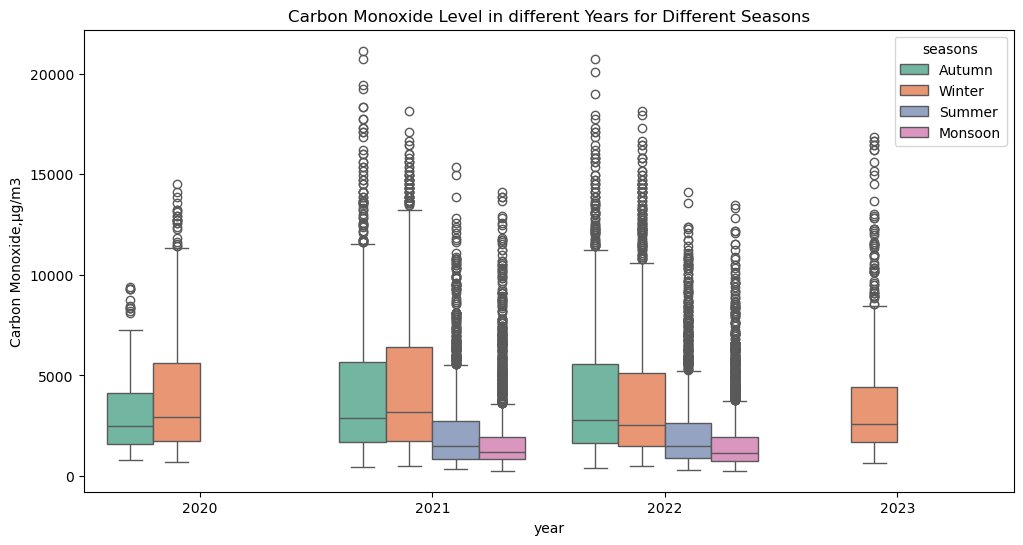

In [62]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Carbon Monoxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Carbon Monoxide Level in different Years for Different Seasons")
plt.show()

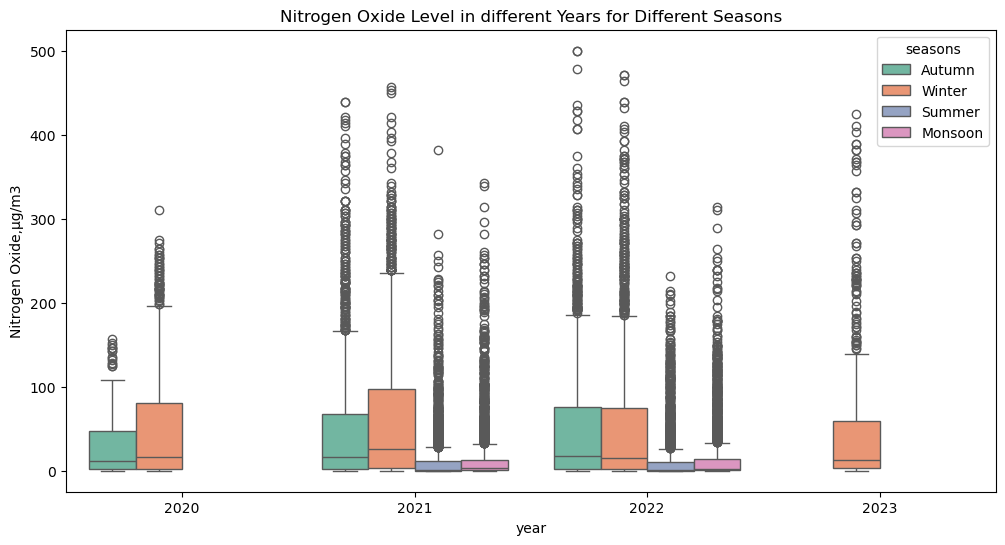

In [63]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Oxide Level in different Years for Different Seasons")
plt.show()

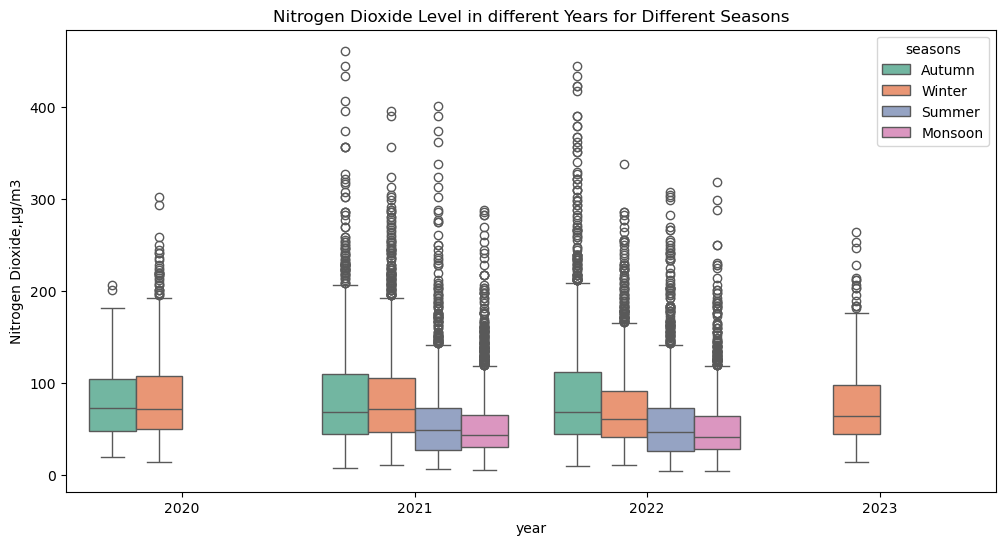

In [64]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="Set2")
plt.title("Nitrogen Dioxide Level in different Years for Different Seasons")
plt.show()

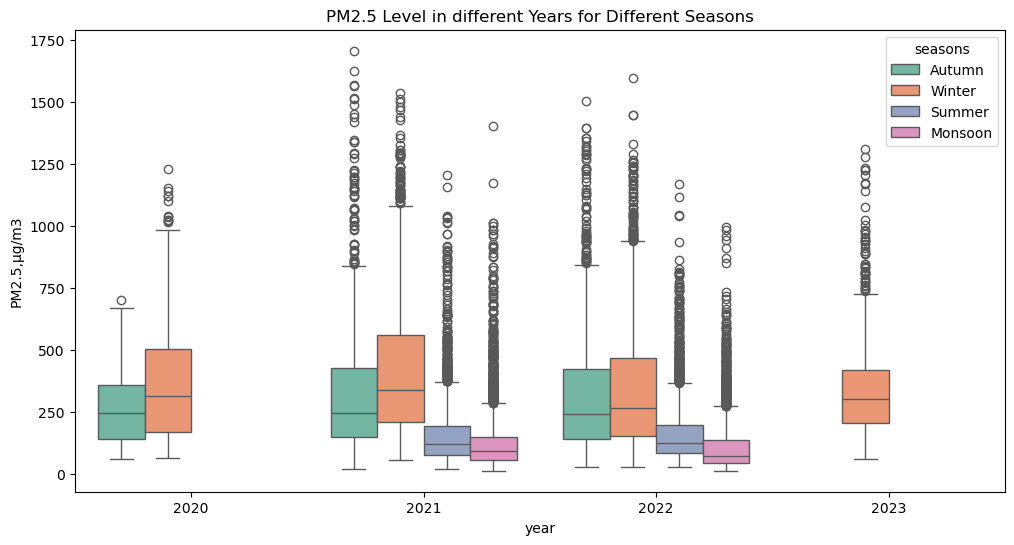

In [65]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM2.5,μg/m3", hue="seasons",palette="Set2")
plt.title("PM2.5 Level in different Years for Different Seasons")
plt.show()

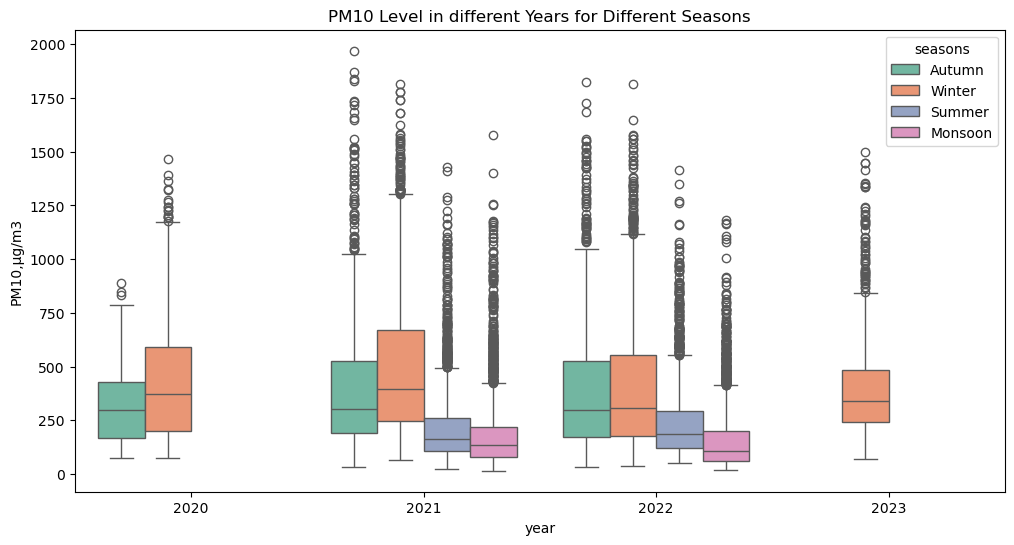

In [66]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="PM10,μg/m3", hue="seasons",palette="Set2")
plt.title("PM10 Level in different Years for Different Seasons")
plt.show()

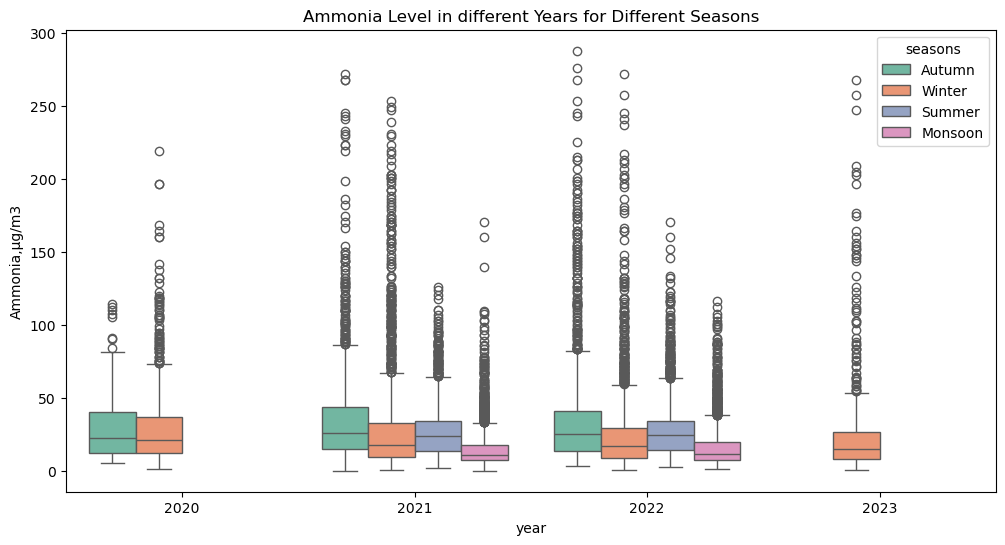

In [67]:
fig, ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, x="year", y="Ammonia,μg/m3", hue="seasons",palette="Set2")
plt.title("Ammonia Level in different Years for Different Seasons")
plt.show()


<li> It can be observed that the concentration of the pollutants are high in the winter and almost high in autumn seasons.Autumn season is almost offset of the rainy season and onset of winter season.As the cold air is denser than the warm air, so the cold air will trap the particles but it will not carry the pollutants away.So the pollutants will be the air which causes the increase of the pollutants in winter season and autumn season.PM10 and PM2.5 values are higher in the winter seasons. </li>
<br/> 
<li> There are many outlier values in all parameters and the outlier values are very high than other values.This shows the pollutant concentrations are very high than the normal range.The higher values are in the year 2021 and 2022. </li>

Pollutants Concentration in Different Hours of the Day for Different Seasons

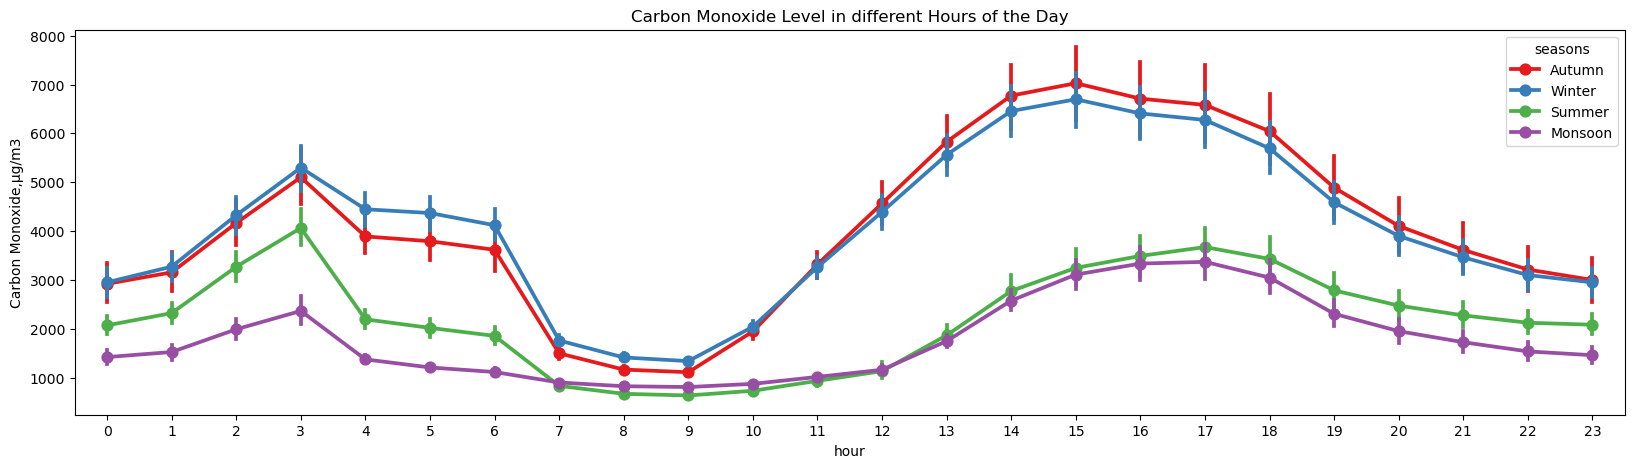

In [68]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Carbon Monoxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Carbon Monoxide Level in different Hours of the Day")
plt.show()

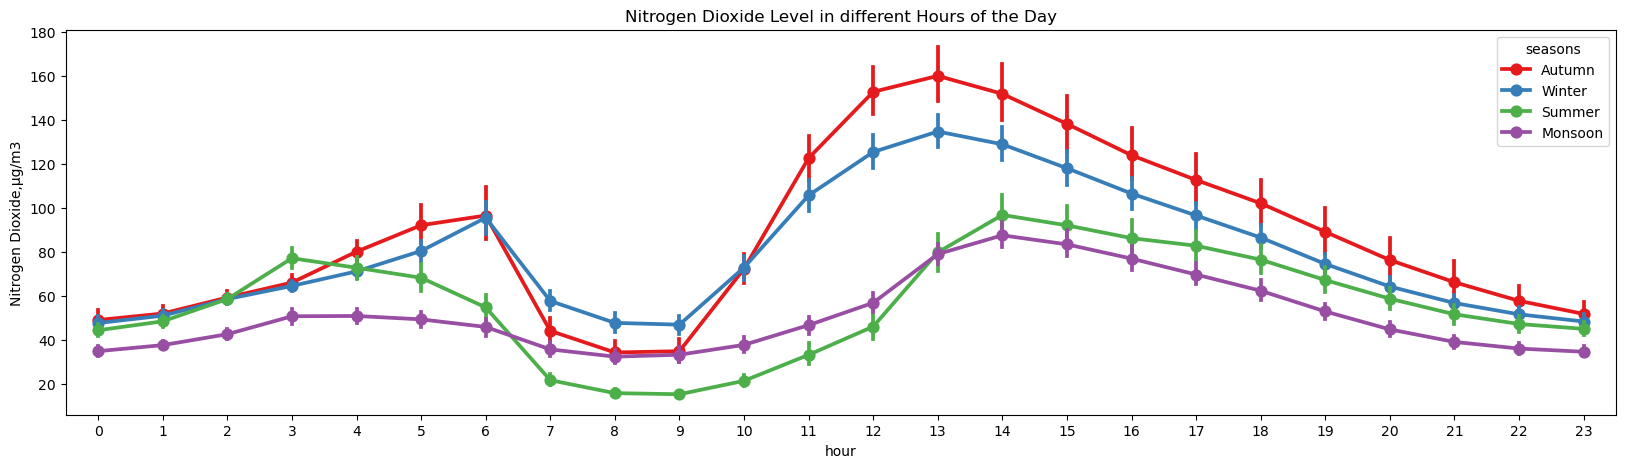

In [69]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Dioxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Dioxide Level in different Hours of the Day")
plt.show()

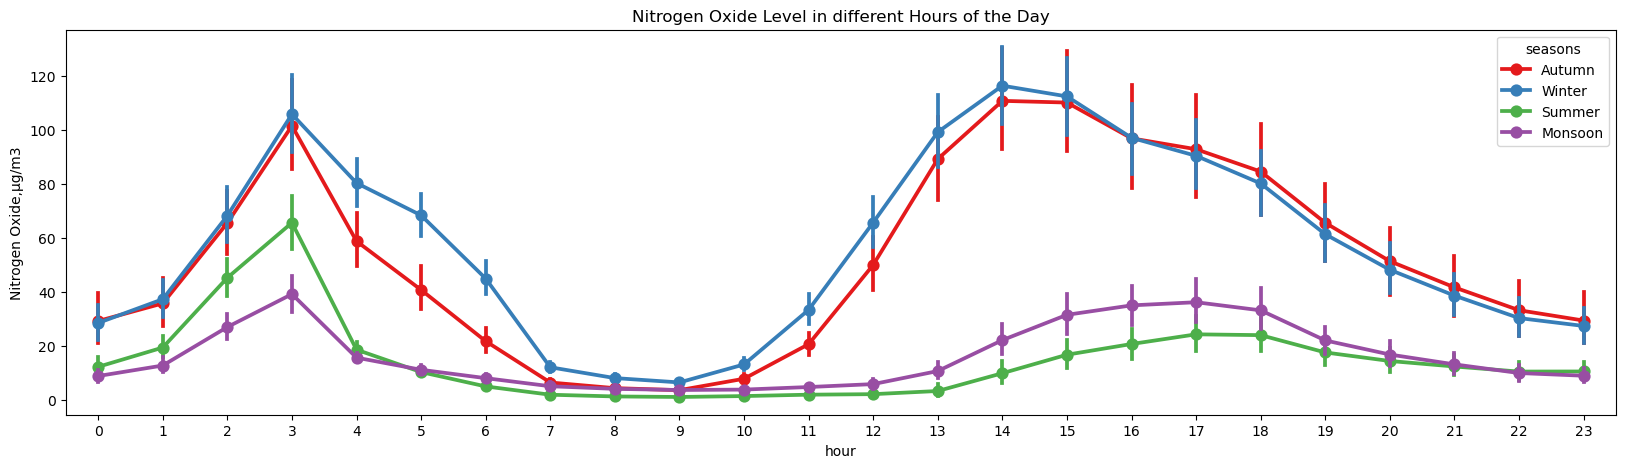

In [70]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Nitrogen Oxide,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Nitrogen Oxide Level in different Hours of the Day")
plt.show()

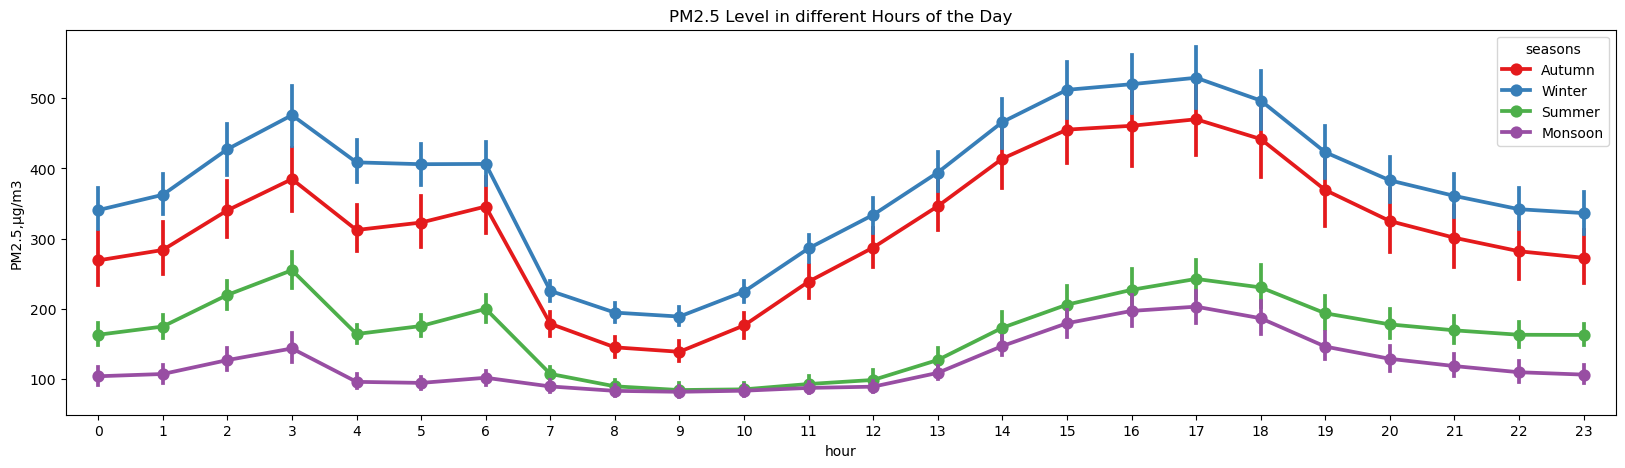

In [71]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM2.5,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM2.5 Level in different Hours of the Day")
plt.show()

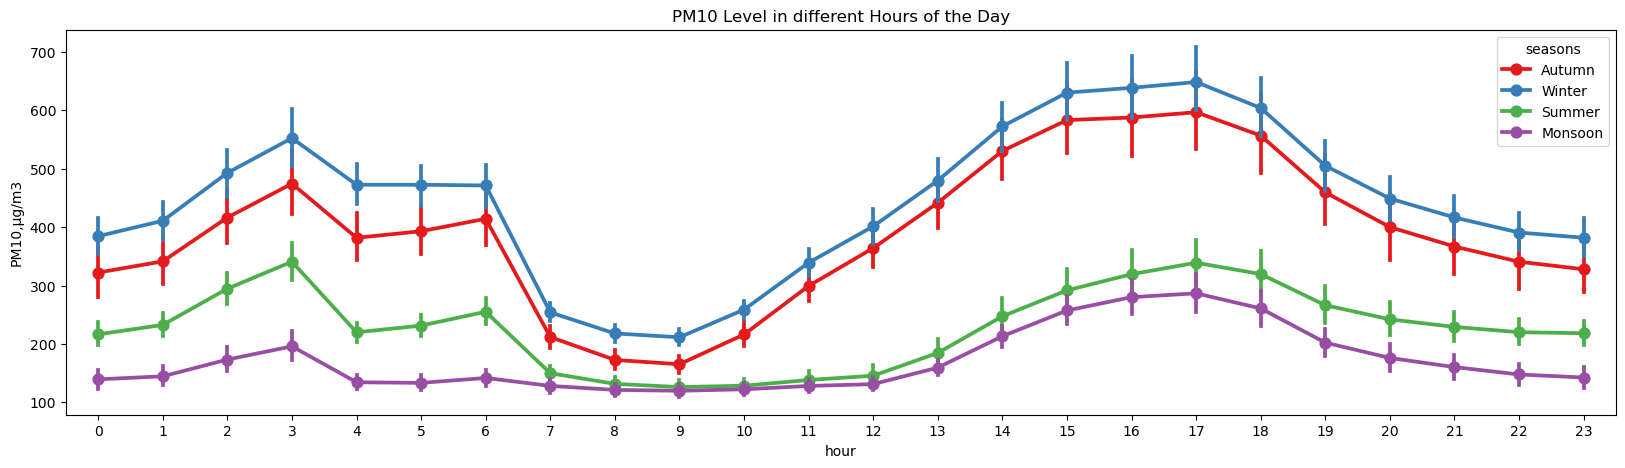

In [72]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="PM10,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("PM10 Level in different Hours of the Day")
plt.show()

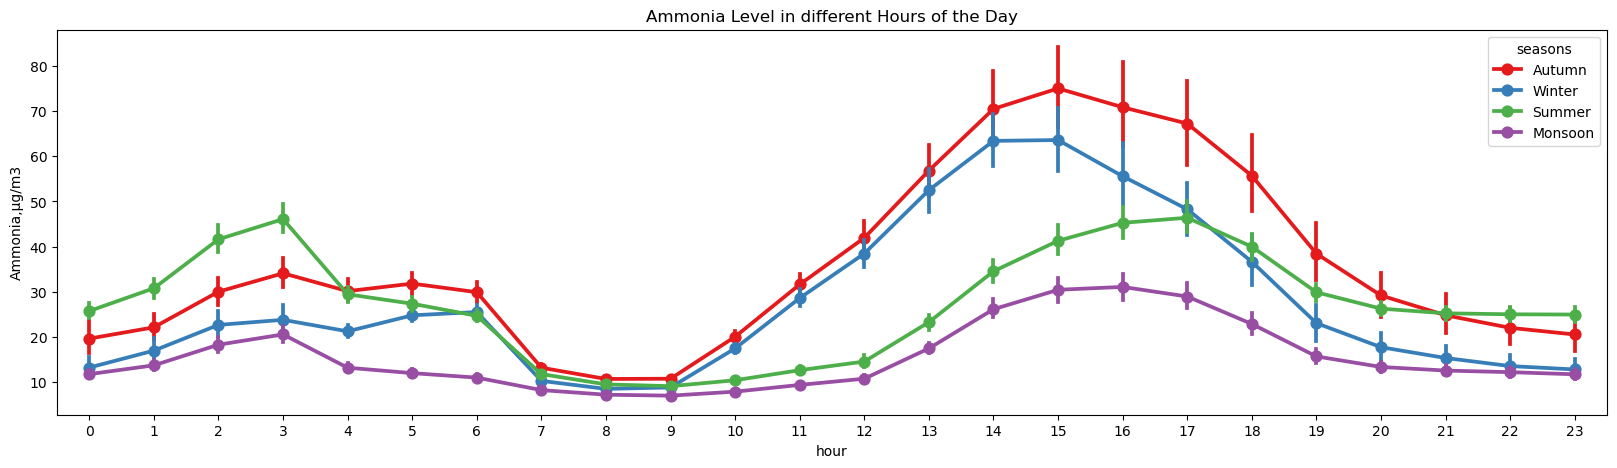

In [73]:
fig, ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=df1, x="hour", y="Ammonia,μg/m3",hue="seasons",palette="Set1")
plt.xticks(np.arange(0, 24, 1))
plt.title("Ammonia Level in different Hours of the Day")
plt.show()

All the parameters are showing high concentration after the peak hours and all are following the same trend.The concentrations are very high after 1 pm till 7pm.

Pollutants Concentration in Different Days for Different Seasons

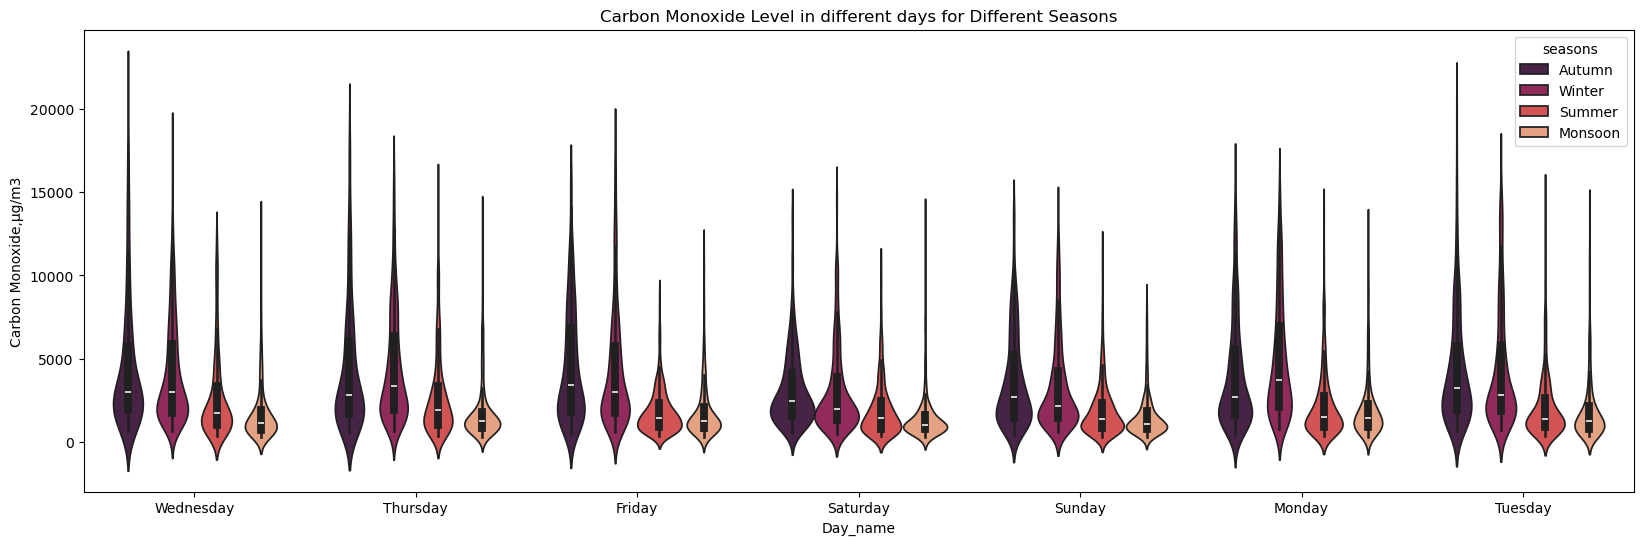

In [74]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Carbon Monoxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Carbon Monoxide Level in different days for Different Seasons")
plt.show()


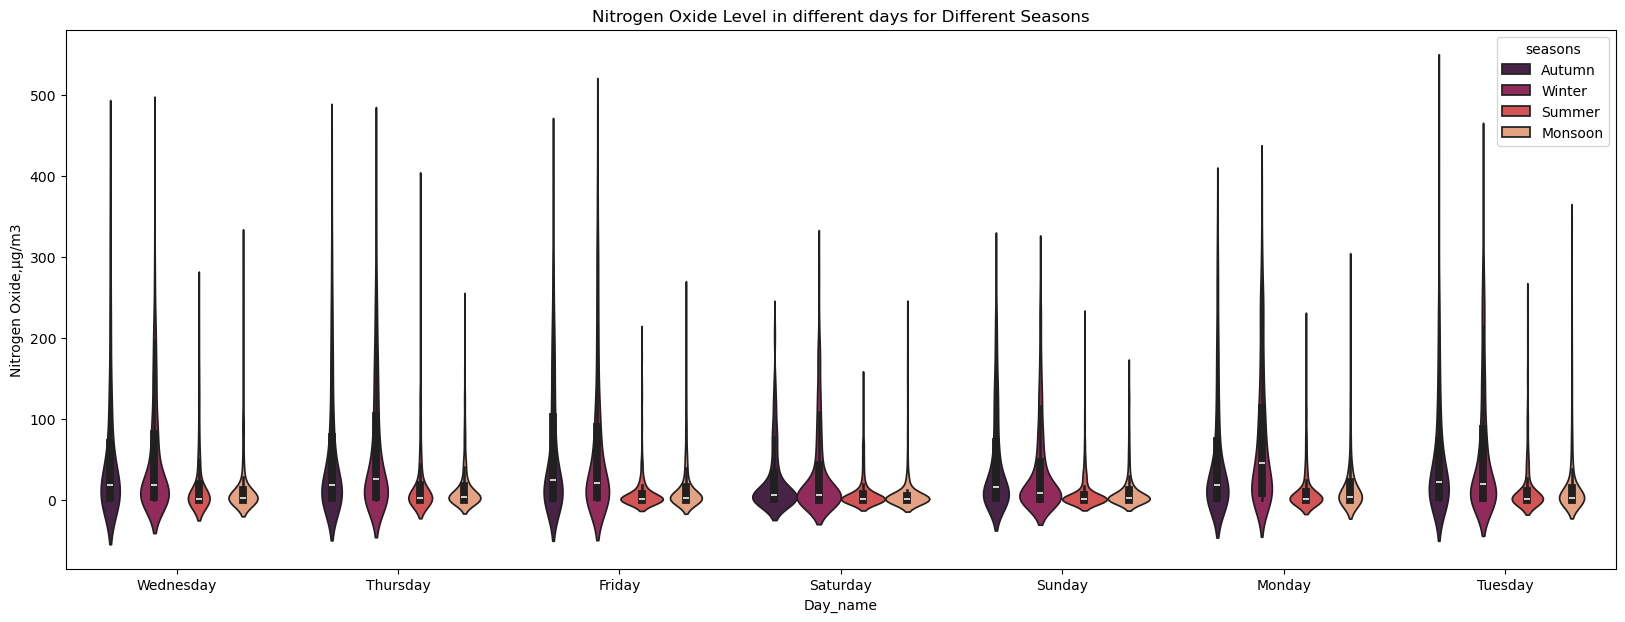

In [75]:
fig, ax= plt.subplots(figsize=(20,7))
sns.violinplot(data=df1, x="Day_name", y="Nitrogen Oxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Oxide Level in different days for Different Seasons")
plt.show()

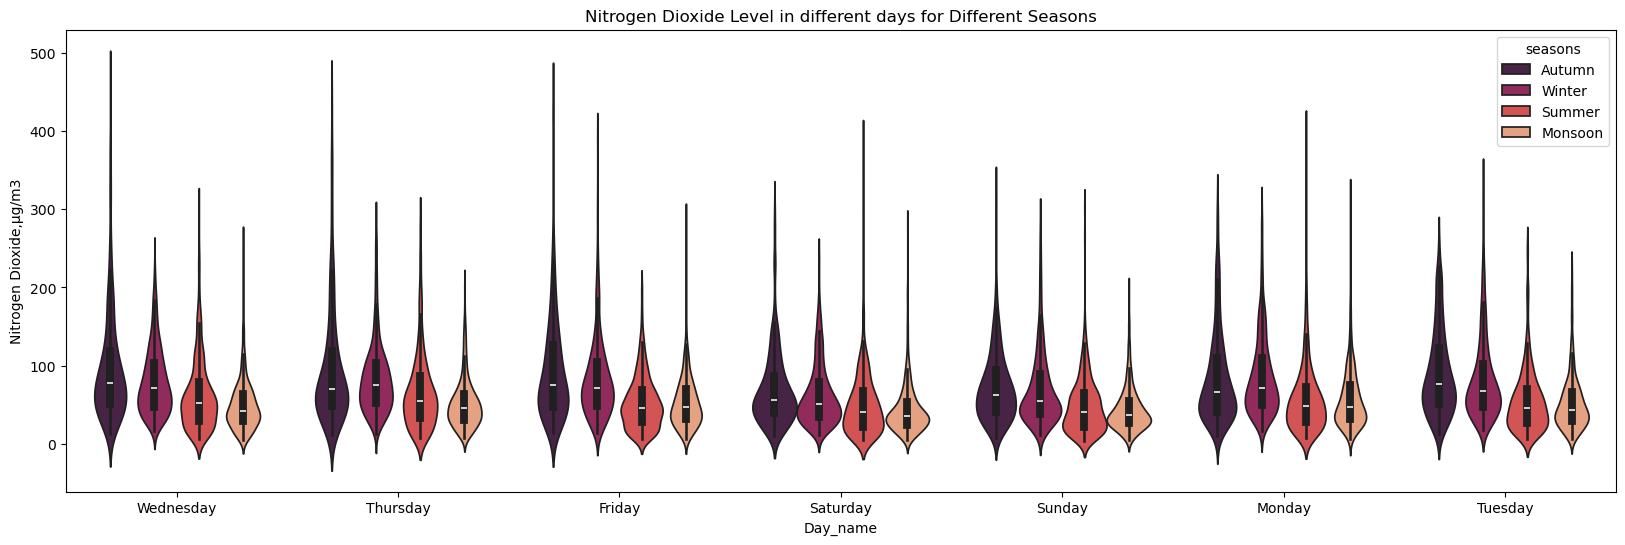

In [76]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Nitrogen Dioxide,μg/m3", hue="seasons",palette="rocket")
plt.title("Nitrogen Dioxide Level in different days for Different Seasons")
plt.show()

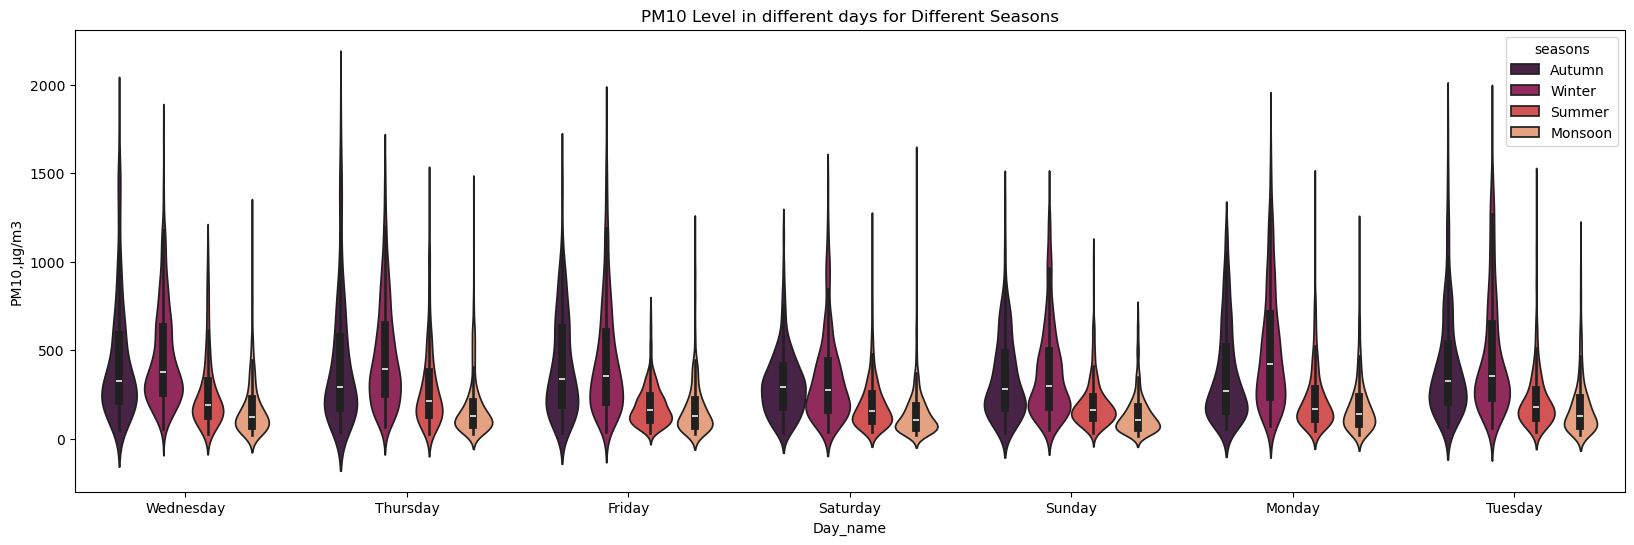

In [77]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="PM10,μg/m3", hue="seasons",palette="rocket")
plt.title("PM10 Level in different days for Different Seasons")
plt.show()

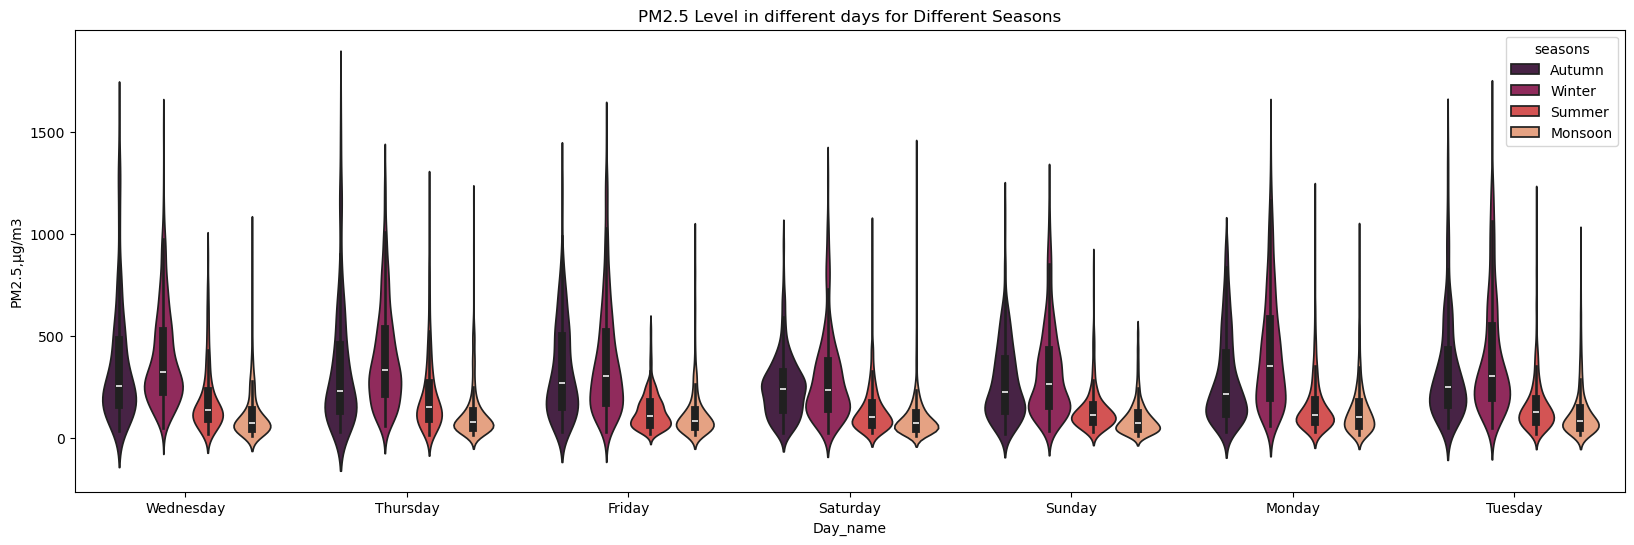

In [78]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="PM2.5,μg/m3", hue="seasons",palette="rocket")
plt.title("PM2.5 Level in different days for Different Seasons")
plt.show()

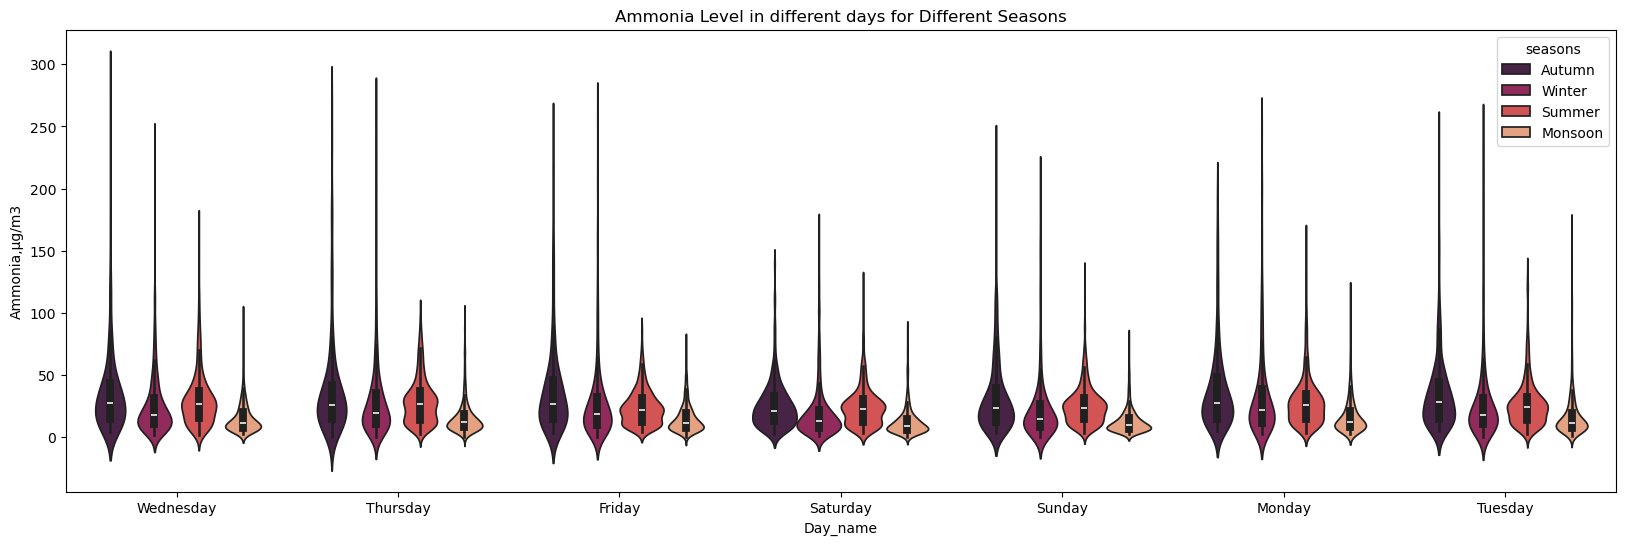

In [79]:
fig, ax= plt.subplots(figsize=(20,6))
sns.violinplot(data=df1, x="Day_name", y="Ammonia,μg/m3", hue="seasons",palette="rocket")
plt.title("Ammonia Level in different days for Different Seasons")
plt.show()

The concentration of the pollutants are high during the autumn and winter seasons and mainly on fridays and Mondays the concentrations are higher compared to other days.

In [80]:
df1['date'] = pd.to_datetime(df['date']).dt.date
df1['time'] = pd.to_datetime(df['date']).dt.time

In [82]:
AQIData = df1.groupby(['date'])[['Carbon Monoxide,μg/m3','Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3','Ozone,μg/m3','Sulphur Dioxide,μg/m3','PM2.5,μg/m3','PM10,μg/m3','Ammonia,μg/m3']].mean()
AQIData['Carbon Monoxide,mg/m3'] = (AQIData['Carbon Monoxide,μg/m3']/1000).round(2)
AQIData= AQIData.drop(['Carbon Monoxide,μg/m3'],axis =1)
AQIData['NOx,μg/m3'] = AQIData['Nitrogen Oxide,μg/m3']+AQIData['Nitrogen Dioxide,μg/m3']
AQIData= AQIData.drop(['Nitrogen Oxide,μg/m3','Nitrogen Dioxide,μg/m3'],axis =1)

In [83]:
AQIData.head(5)

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
date                                                                      
2020-11-25    26.791304              82.430870   342.301739  405.037826   
2020-11-26    20.753333              65.158333   180.754167  226.001250   
2020-11-27    43.925000              41.485000   115.901667  143.952500   
2020-11-28    50.372500              41.515417   197.889167  234.861250   
2020-11-29    34.696250              77.785417   329.381667  404.049583   

            Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  
date                                                          
2020-11-25      26.720435                   2.97  108.429130  
2020-11-26      21.993750                   2.31   89.862500  
2020-11-27      20.280000                   1.59   61.155833  
2020-11-28      23.145000                   2.46   81.926250  
2020-11-29      47.233750                   4.52  159.669167

In [84]:
def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

AQIData["PM2.5_SubIndex"] = AQIData["PM2.5,μg/m3"].apply(lambda x: PM25_subindex(x))

def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

AQIData["PM10_SubIndex"] = AQIData["PM10,μg/m3"].apply(lambda x: PM10_subindex(x))


def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

AQIData["SO2_SubIndex"] = AQIData["Sulphur Dioxide,μg/m3"].apply(lambda x: SO2_subindex(x))


def NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

AQIData["NOx_SubIndex"] = AQIData["NOx,μg/m3"].apply(lambda x: NOx_subindex(x))

def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

AQIData["CO_SubIndex"] = AQIData["Carbon Monoxide,mg/m3"].apply(lambda x: CO_subindex(x))


def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0
    
def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

AQIData["NH3_SubIndex"] = AQIData["Ammonia,μg/m3"].apply(lambda x: NH3_subindex(x))    

AQIData["O3_SubIndex"] = AQIData["Ozone,μg/m3"].apply(lambda x: O3_subindex(x))


AQIData["Checks"] = (AQIData["PM2.5_SubIndex"] > 0).astype(int) + \
                (AQIData["PM10_SubIndex"] > 0).astype(int) + \
                (AQIData["SO2_SubIndex"] > 0).astype(int) + \
                (AQIData["NOx_SubIndex"] > 0).astype(int) + \
                (AQIData["NH3_SubIndex"] > 0).astype(int) + \
                (AQIData["CO_SubIndex"] > 0).astype(int) + \
                (AQIData["O3_SubIndex"] > 0).astype(int)

AQIData["AQI_calculated"] = round(AQIData[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))


AQIData.head(5)

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
date                                                                      
2020-11-25    26.791304              82.430870   342.301739  405.037826   
2020-11-26    20.753333              65.158333   180.754167  226.001250   
2020-11-27    43.925000              41.485000   115.901667  143.952500   
2020-11-28    50.372500              41.515417   197.889167  234.861250   
2020-11-29    34.696250              77.785417   329.381667  404.049583   

            Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  PM2.5_SubIndex  \
date                                                                           
2020-11-25      26.720435                   2.97  108.429130      471.001338   
2020-11-26      21.993750                   2.31   89.862500      346.733974   
2020-11-27      20.280000                   1.59   61.155833      286.338889   
2020-11-28      23.145000                   2.46   81.926250      359.914744   
2020-11-29      47.233750                   4.52  159.669167      461.062821   

            PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  CO_SubIndex  \
date                                                                 
2020-11-25     368.797283    100.810290    128.429130      112.125   
2020-11-26     184.000833     81.447917    109.862500      103.875   
2020-11-27     129.301667     51.856250     76.444792       79.500   
2020-11-28     189.907500     51.894271    101.926250      105.750   
2020-11-29     367.561979     97.231771    179.669167      131.500   

            NH3_SubIndex  O3_SubIndex  Checks  AQI_calculated  
date                                                           
2020-11-25      6.680109    26.791304       7           471.0  
2020-11-26      5.498437    20.753333       7           347.0  
2020-11-27      5.070000    43.925000       7           286.0  
2020-11-28      5.786250    50.372500       7           360.0  
2020-11-29     11.808437    34.696250       7           461.0

In [85]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [86]:
AQIData["AQI_bucket_calculated"] = AQIData["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
AQIData = AQIData.reset_index()
AQIData.head(5)

date  Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  \
0  2020-11-25    26.791304              82.430870   342.301739  405.037826   
1  2020-11-26    20.753333              65.158333   180.754167  226.001250   
2  2020-11-27    43.925000              41.485000   115.901667  143.952500   
3  2020-11-28    50.372500              41.515417   197.889167  234.861250   
4  2020-11-29    34.696250              77.785417   329.381667  404.049583   

   Ammonia,μg/m3  Carbon Monoxide,mg/m3   NOx,μg/m3  PM2.5_SubIndex  \
0      26.720435                   2.97  108.429130      471.001338   
1      21.993750                   2.31   89.862500      346.733974   
2      20.280000                   1.59   61.155833      286.338889   
3      23.145000                   2.46   81.926250      359.914744   
4      47.233750                   4.52  159.669167      461.062821   

   PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  CO_SubIndex  NH3_SubIndex  \
0     368.797283    100.810290    128.429130      112.125      6.680109   
1     184.000833     81.447917    109.862500      103.875      5.498437   
2     129.301667     51.856250     76.444792       79.500      5.070000   
3     189.907500     51.894271    101.926250      105.750      5.786250   
4     367.561979     97.231771    179.669167      131.500     11.808437   

   O3_SubIndex  Checks  AQI_calculated AQI_bucket_calculated  
0    26.791304       7           471.0                Severe  
1    20.753333       7           347.0             Very Poor  
2    43.925000       7           286.0                  Poor  
3    50.372500       7           360.0             Very Poor  
4    34.696250       7           461.0                Severe

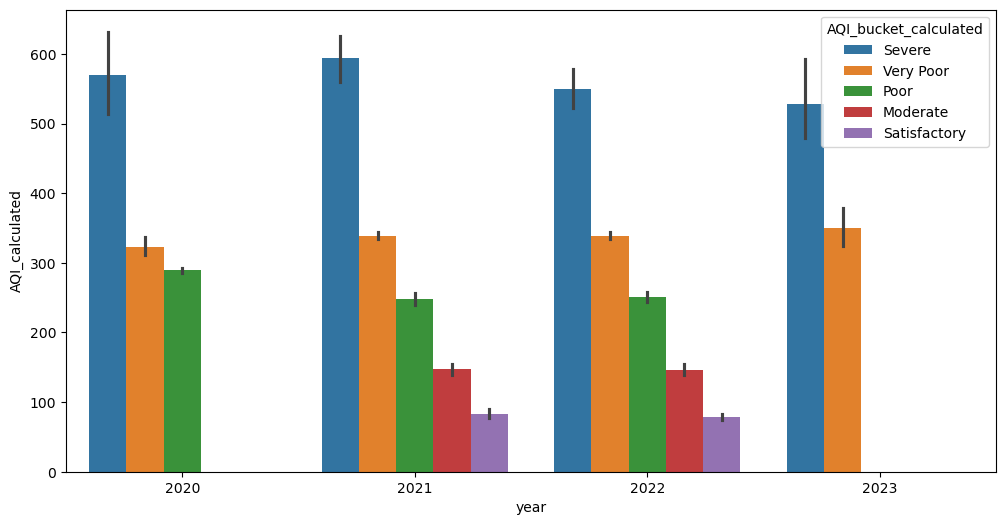

In [95]:
AQIData['date'] = pd.to_datetime(AQIData['date'])
AQIData['year'] = AQIData['date'].dt.year
fig, ax= plt.subplots(figsize=(12,6))
sns.barplot(data=AQIData, x="year", y="AQI_calculated",hue ='AQI_bucket_calculated')
plt.show()

The AQI was severe during the year 2021

In [96]:
AQIData1 = AQIData.drop(['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex','CO_SubIndex','O3_SubIndex','Checks','year'],axis =1)

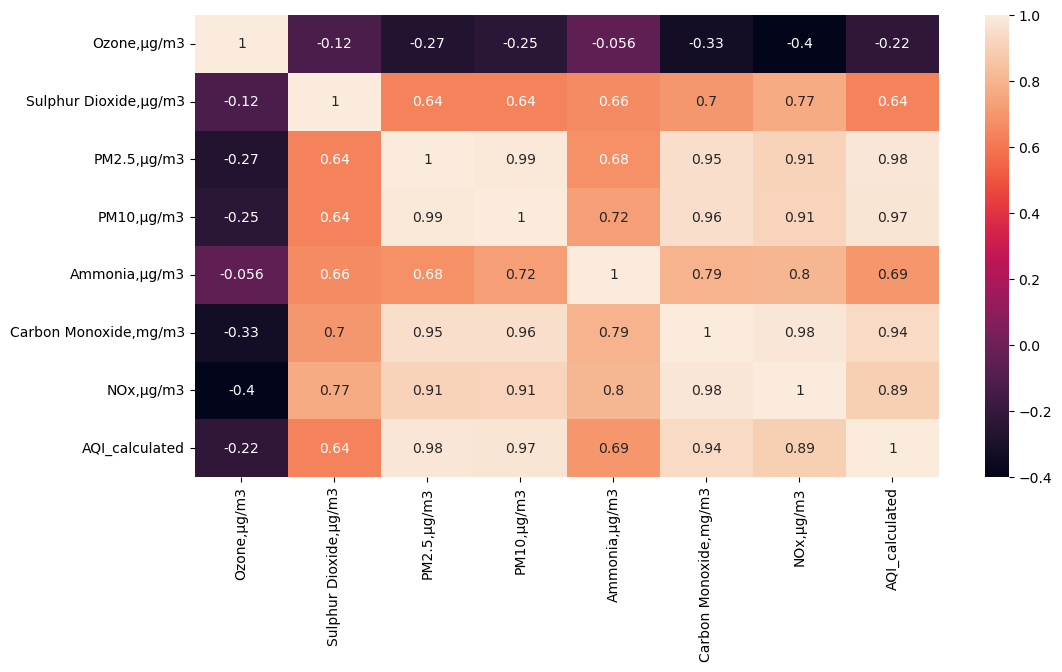

In [97]:
AQIData2 = AQIData1.iloc[:,1:9]
corr_matrix = AQIData2.corr()
fig, ax= plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [98]:
AQIData2.head()

Ozone,μg/m3  Sulphur Dioxide,μg/m3  PM2.5,μg/m3  PM10,μg/m3  Ammonia,μg/m3  \
0    26.791304              82.430870   342.301739  405.037826      26.720435   
1    20.753333              65.158333   180.754167  226.001250      21.993750   
2    43.925000              41.485000   115.901667  143.952500      20.280000   
3    50.372500              41.515417   197.889167  234.861250      23.145000   
4    34.696250              77.785417   329.381667  404.049583      47.233750   

   Carbon Monoxide,mg/m3   NOx,μg/m3  AQI_calculated  
0                   2.97  108.429130           471.0  
1                   2.31   89.862500           347.0  
2                   1.59   61.155833           286.0  
3                   2.46   81.926250           360.0  
4                   4.52  159.669167           461.0

<Figure size 2000x800 with 0 Axes>

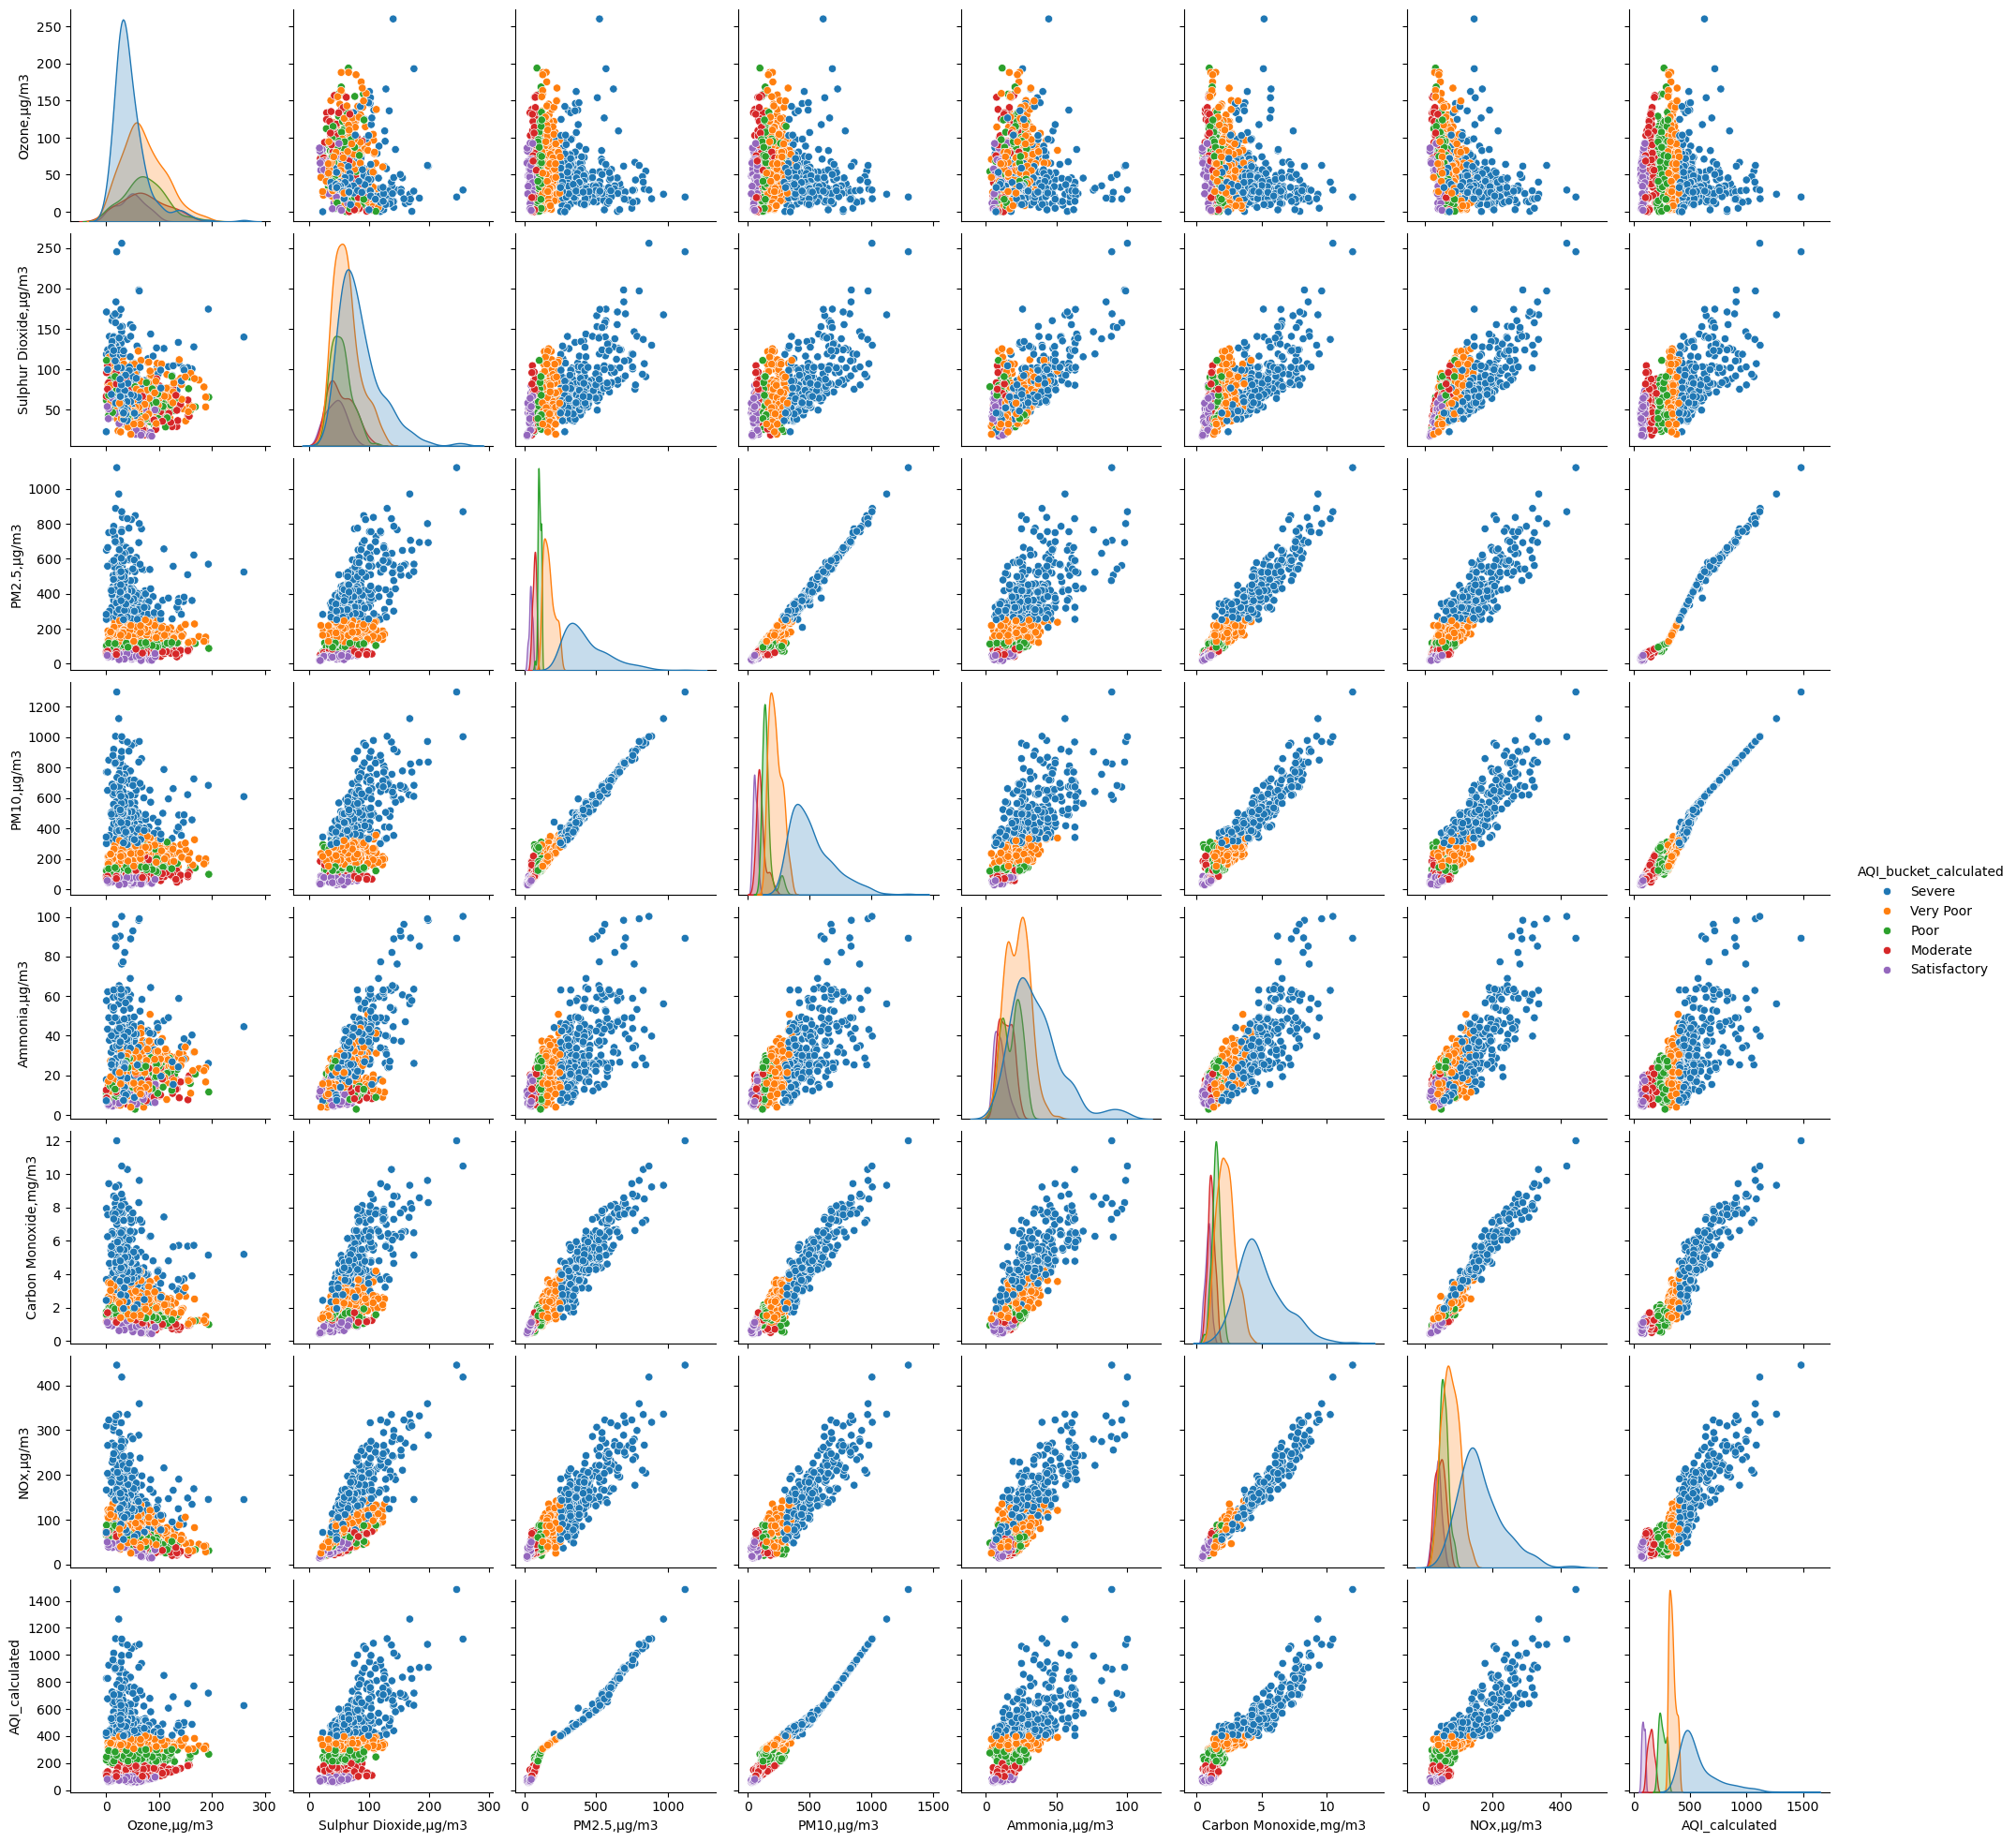

In [101]:
plt.figure(figsize=(20,8))
sns.pairplot(AQIData1,hue = 'AQI_bucket_calculated')
plt.show()

In [102]:
x = AQIData2.drop(['AQI_calculated'],axis =1)
y = AQIData2['AQI_calculated']

# Model Building

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=101)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)
print(linreg.coef_)
print(linreg.intercept_)

[ 0.14744732  0.23564586  0.85272872  0.18329489  0.37762501 12.23920043
 -0.42219958]
88.65931459055173


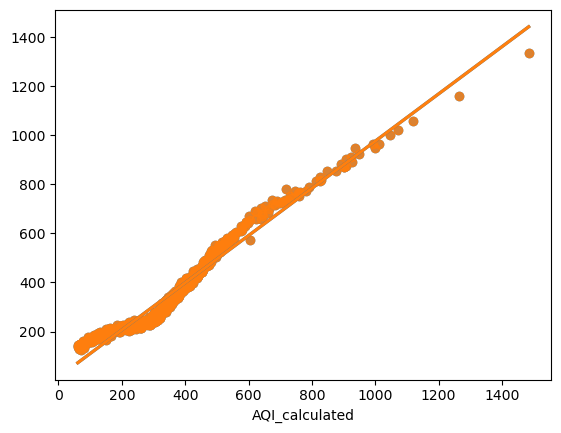

In [107]:
sns.regplot(x=y_train,y=y_pred_train,ci=None);
plt.show()

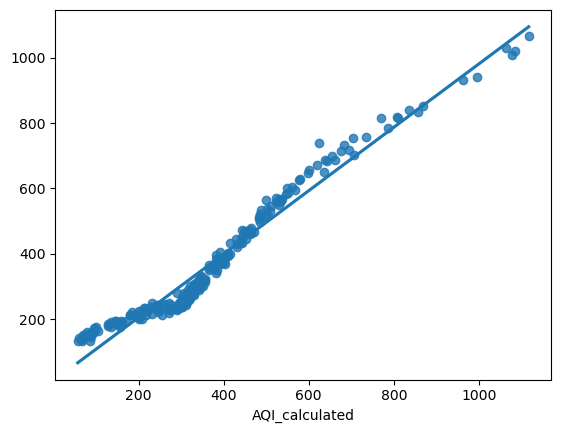

In [108]:
sns.regplot(x=y_test,y=y_pred_test,ci=None);
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [110]:
MAE_train = mean_absolute_error(y_pred_train,y_train)
MAE_test = mean_absolute_error(y_pred_test,y_test)
RMSE_train = np.sqrt(mean_absolute_error(y_pred_train,y_train))
RMSE_test = np.sqrt(mean_absolute_error(y_pred_test,y_test))
R2_sq_train = r2_score(y_pred_train,y_train)
R2_sq_test = r2_score(y_pred_test,y_test)
data = {'Testdata' : [MAE_test,RMSE_test,R2_sq_test],
       'Traindata' : [MAE_train,RMSE_train,R2_sq_train]}
df_lr = pd.DataFrame(data , index = ['MAE','RMSE','R2 Score'])
df_lr

Testdata  Traindata
MAE       35.010579  32.180548
RMSE       5.916974   5.672790
R2 Score   0.957863   0.960617

In [111]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linreg, x, y, cv=10, scoring="r2").mean())

0.9165085627974866
